<a href="https://colab.research.google.com/github/Laxmi-404/Deep-Learning/blob/main/DL3_NEURALNETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [ ]:
# using MNIST class
root=r'C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING'
dataset=MNIST(root=root,download=True,transform=ToTensor())
# image converted to pytorch tensors

In [ ]:
val_size=10000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(50000, 10000)

In [ ]:
batch_size=128

In [ ]:
train_loader=DataLoader(train_ds, batch_size=128,shuffle=True,num_workers=2,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=2,pin_memory=True)

num_workers=4:
What it does: This parameter specifies how many subprocesses to use for data loading in parallel.

How it works: By default, PyTorch uses a single worker to load data, which can slow down the training process, especially if your dataset is large.

Setting num_workers=4 means that the DataLoader will use 4 subprocesses to load the data, potentially speeding up the data loading time and improving overall training efficiency, particularly for large datasets.

pin_memory=True:

What it does: This parameter tells PyTorch to allocate the data in page-locked memory (also known as pinned memory) during loading.

How it works: By default, PyTorch loads data onto the CPU and then transfers it to the GPU during training.

When pin_memory=True is set, the DataLoader will allocate the memory in such a way that the data can be transferred to the GPU more efficiently, as pinned memory is faster to transfer from the CPU to GPU.

WHY TO TRANSFER DATA FROM CPU TO GPU?

GPUs are Optimized for Parallel Processing:
GPUs (Graphics Processing Units) are designed specifically to handle many calculations simultaneously (parallel processing), which is perfect for the massive number of operations required in deep learning models.

While a CPU (Central Processing Unit) is great for general-purpose computing and tasks that require serial processing, GPUs excel in tasks that can be parallelized (like matrix multiplications, which are common in neural networks).

A GPU can process thousands of operations at once, speeding up tasks like training large models, computing gradients during backpropagation, and making predictions with complex models.

Stochastic gradient descent works on batches as it cant load whole data at a time.

In [ ]:
for images,_ in train_loader:
  print('images.shape',images.shape)
  break

images.shape torch.Size([128, 1, 28, 28])


But matplotlib expects the tensor to move the channels to the last dimension by .permute method.

make_grid to analyse batch of image

nrow parameter in make_grid() specifies the number of images to display per row.

plt.imshow requires an image and hence using make_grid to plot.

images.shape: torch.Size([128, 1, 28, 28])


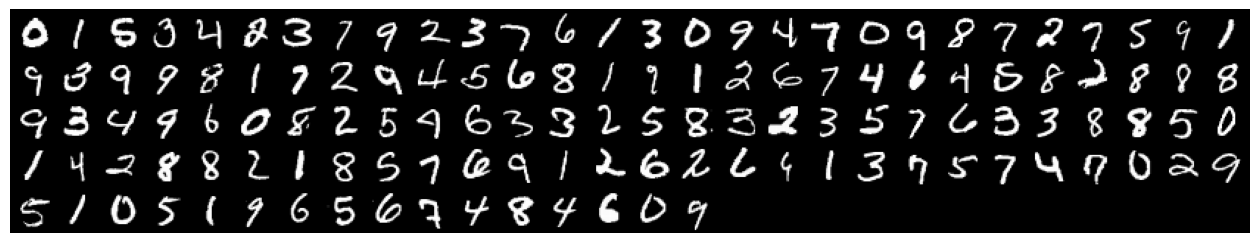

In [ ]:
for images,_ in train_loader:
  print('images.shape:',images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images,nrow=28).permute(1,2,0))
  break

images.permute(1, 2, 0)
This is reordering the dimensions from (batch_size, channels, height, width) to (height, width, channels):

1: This moves the channel dimension (which is 1 for grayscale) to the last position.

2: This moves the height dimension (28) to the first position.

0: This moves the batch size (which is 1) to the second position (we are using just one image here, so this doesn't change the tensor much in this case).

F.relu() is a function in PyTorch that applies the ReLU activation function element-wise to the input tensor. ReLU stands for Rectified Linear Unit and is one of the most commonly used activation functions in neural networks, especially in deep learning.

Capturing Complex Patterns:
Real-world data is often highly non-linear. For example, in image recognition, the relationship between pixels and the objects they represent is not simply linear — it's complex and involves interactions between various features of the image (e.g., edges, textures, shapes).

A neural network without non-linear activation functions would simply learn linear transformations, meaning it could only approximate linear relationships between inputs and outputs. This would make the network much less capable in tasks like classification, regression, or any task that involves more intricate patterns.

Non-linear activations (like ReLU, sigmoid, tanh, etc.) allow the network to learn these non-linear relationships, enabling it to approximate any kind of mapping between inputs and outputs, making it much more powerful for a variety of tasks.


2. Increasing Expressive Power:
With a linear model, even if you stack multiple layers (deep layers), the network would still behave like a single linear transformation. This is because a composition of linear functions is still a linear function.

In [ ]:
def model(xb):
  return xb @ w.t()+b

# nn.Linear(in_size,out_size)

# nn.Linear(28*28,16)
# nn.Linear(16,10)
# Taking batch of 16 outputs and converting it to 10

# forward():
#   out=self.linear1(xb)
#   out=F.relu()
# Applying something non linear,so that you can no longer simplify eqn and hence model has much more capability than just a matrix multiplication.
#   out=self.linear2(out)
#    return out

# out=self.linear2(self.linear1(xb))
# out=self.linear2(xb @ w1.t()+b1) @ w2.t()+b2
# = xb @(w1 @ w2)+ xb@(b1 @ w1)+b2
# = xb @((w1 @ w2)+ (b1 @ w1))+b2
# xb*w3+b2=self.linear3(xb)


To improve the logistic regression,we willl cfreate a neural n/w.

** Instead of using a single nn.Linear obj to transform a batch of inputs(pixel intensities) and a batch of outputs(class probabilities),we will use 2 nn.Linear objects.Each of these is called layer in the network.

** The first layer(hidden layer) will transform the input matrix of shape batch_size 784 into an intermediate output matrix of shape batch_size*hidden_size,where hidden_size is preconfigured parameter.

** The intermediate outputs are then passed into a non linear activation function,which operates on individual elements of output matrix.

** The result of activation function of size btch_size*hidden_size,is passed into the second layer(output layer) which transforms it into batch_size*10 identical to outputof logistic regression model.

The activation function is called Rectified Linear Unit(Relu function) using relu(x)=max(0,x) if negative change to 0 rest same.

In [ ]:
# Model
# dim=0 refers to operating along the rows (axis 0), meaning you would be looking across all elements in each column.
# dim=1 refers to operating along the columns (axis 1), meaning you would be looking across all elements in each row.
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

xb is your input tensor, typically with a shape like [batch_size, channels, height, width] for image data.

xb.size(0) retrieves the batch size, which is the number of samples in the batch.

-1 in the view() function is a special argument that tells PyTorch to infer the correct size for that dimension based on the other dimensions and the total number of elements in the tensor.

Imagine you have a batch of images, like a group of 32 pictures, and each picture is 28x28 pixels with 3 color channels (RGB). This is the shape of the data you have: [32, 3, 28, 28].

Now, when you want to feed these images into a fully connected layer (like a layer that makes decisions based on the features), it doesn't work well with the image shape [32, 3, 28, 28] because the fully connected layer expects each image to be one long "list" of numbers (instead of a 2D grid of pixels).

So, the line xb = xb.view(xb.size(0), -1) does the following:

Flattens each image: It takes each image (which has a size of 3x28x28, or 2352 numbers per image) and flattens it into a long list of 2352 numbers.

Keeps the batch size: The batch size (32 in this case) stays the same, meaning you still have 32 images, but each image is now just a long list of numbers.

The result is a new shape of [32, 2352], where each of the 32 images is now represented as a list of 2352 numbers (the original 28x28 pixels, with 3 color channels, all flattened out).

It's like taking a 2D picture and rolling it out into a 1D line, so the model can look at all the values in that "line" to make decisions!

In [ ]:
class MnistModel(nn.Module):
  def __init__(self,in_size,hidden_size,out_size):
    super().__init__()
    # hidden layer
    self.linear1=nn.Linear(in_size,hidden_size)
    # output layer
    self.linear2=nn.Linear(hidden_size,out_size)

  def forward(self,xb):
    # Flatten the image tensors
    xb=xb.view(xb.size(0),-1)
    # Get intermediate outputs using hidden layers
    out=self.linear1(xb)
    # Apply activation function
    out=F.relu(out)
    # Get predictions using output layer
    out=self.linear2(out)
    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    # acc=accuracy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc=accuracy(out,labels)
    return {'val_loss':loss.detach(),'val_acc':acc}

# In PyTorch, loss.detach() is used to create a new tensor that shares the same data as the original loss tensor but without tracking gradients. This means that the detached tensor will not be part of the computation graph for backpropagation.
# Memory Efficiency:
# By detaching the tensor, you save memory by not storing the intermediate operations that would otherwise be tracked for backpropagation.


  def validation_epoch_end(self,outputs):
    print(outputs)
    # for x in outputs:
    # print(x.keys())  # Check the dictionary keys to ensure 'val_loss' is present
    # print(x['val_loss'].shape)  # Inspect the shape of the 'val_loss' tensor

    # device = outputs[0]['val_loss'].device
    # print(device)
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean().item()
    batch_accs=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean().item()
    return [{'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}]

  def epoch_end(self,epoch,result):
    print("Epoch[{}],val_loss{:.4f},val_acc{:.4f}".format(epoch,result['val_loss'],result['val_acc']))


In [ ]:
input_size=784
out_size=10
hidden_size=32
# Making hidden layers give power to your model as each layer is learning something about your model

In [ ]:
model=MnistModel(input_size,hidden_size,out_size)

In [ ]:
model

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


torch.Size([32, 784]):
This is likely the weight matrix of a fully connected (linear) layer.

784 corresponds to the number of input features (for example, if you're working with 28x28 grayscale images, this is the flattened size: 28 * 28 = 784).

32 is the number of output neurons or the number of units in this layer (i.e., how many features the model outputs after this layer).

So, this matrix contains the weights that are used to transform the 784 input features into 32 output features (activations).

torch.Size([32]):
This is likely the bias vector for the same layer.

There’s one bias value for each of the 32 output neurons. It’s a 1D tensor of size 32, where each value is added to the corresponding neuron’s output after the weights are applied.


torch.Size([10, 32]):
This is likely another weight matrix, for a subsequent layer in the network.

32 is the number of input features (which would be the number of outputs from the previous layer).

10 is the number of output neurons (this is typical for a classification problem with 10 classes, like MNIST, where the model needs to predict one of 10 classes).

This matrix maps the 32 activations from the previous layer into 10 output classes.

torch.Size([10]):
This is likely the bias vector for the output layer.

There’s one bias value for each of the 10 output neurons (one per class).

Your model seems to be a fully connected neural network with:

A layer that takes a 784-dimensional input (e.g., flattened 28x28 image) and outputs 32 features.

A second layer that takes those 32 features and outputs 10 values (likely corresponding to class probabilities for classification).

Each weight matrix has a shape of [output_size, input_size], and each bias vector has a shape of [output_size].

In [ ]:
for images,labels in train_loader:
  output=model(images)
  loss=F.cross_entropy(output,labels)
  print('Loss',loss)
  break

print('output shape:',output.shape)
print('Sample output: \n',output[:2].data)

Loss tensor(2.3154, grad_fn=<NllLossBackward0>)
output shape: torch.Size([128, 10])
Sample output: 
 tensor([[ 0.1317,  0.2017, -0.0315, -0.1154, -0.0539, -0.1436, -0.2072,  0.1312,
          0.0647,  0.1276],
        [ 0.1382,  0.1264, -0.0821, -0.0526, -0.1111, -0.1693, -0.1301,  0.0745,
          0.0890,  0.0625]])


print('Sample output: \n', output[:2].data)

This prints the first two rows of the output tensor (i.e., the predictions for the first two images in the batch).

torch.nn contains different layers like convolutional layer,hidden layer etc.it has w and b.

torch.nn.functional contains functions like activation function(relu),sigmoid etc.

Some functions works as layers also.

nn.relu=F.relu()

The Universal Approximation Theorem is a fundamental concept in neural networks and machine learning. It essentially states that:

A feedforward neural network with at least one hidden layer, and a sufficiently large number of neurons in that layer, can approximate any continuous function to arbitrary precision, provided the activation function is non-linear.(perfectly learn a dataset)

As the size of our model and dataset increase,we need to use GPU to train our models within a reasonable amount of time.GPUs contain hundreds of cores that are optimized for performing expensive matrix operations on floating point no in short time,which makes them ideal for training deep neural networks with many layers.

Can use nvidia Gpu(lang:cuda)

Colab: If you're using Google Colab, the GPU should be available automatically if you've enabled it under

 Runtime → Change runtime type → Hardware accelerator → GPU.

In [ ]:
torch.cuda.is_available()

False

In [ ]:
def get_default_device():
  # Pick GPU if available,else CPU
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [ ]:
device=get_default_device()
device

device(type='cpu')

In [ ]:
def to_device(dataset,device):
  # Move tensor to chosen device
  if isinstance(dataset,(list,tuple)):
    return [to_device(x,device) for x in dataset]
  return dataset.to(device,non_blocking=True)

The non_blocking=True argument in PyTorch's Tensor.to() function tells PyTorch to attempt to move the tensor to the specified device asynchronously, without blocking the execution of the code while the transfer is happening.

If data is not a list or tuple: If data is just a single tensor (not a list or tuple), it moves the tensor to the specified device using data.to(device, non_blocking=True).

The non_blocking=True argument tells PyTorch to move the tensor asynchronously if possible, which can speed up the transfer to the GPU in some cases.

Check if data is a list or tuple: The function first checks if data is a list or tuple using isinstance(data, (list, tuple)). This allows the function to handle collections of tensors, not just a single tensor.

If data is a list or tuple, the function will recursively call to_device on each element of the collection and return a list of tensors moved to the specified device. This is done using a list comprehension.

In [ ]:
for images,labels in train_loader:
  print(images.shape)
  images=to_device(images,device)
  print(images.device)
  # print(images)
  break
  # batches access ho gye
  # You're iterating through the train_loader (which likely contains batches of data) and accessing individual batches of images and labels

torch.Size([128, 1, 28, 28])
cpu


We define a DataLoader class to wrap our existing data loaders and move data to selected devide,as a batches are accessed.

We don't need to extend an existing class to create a pytorch daatloader.

In [ ]:
class DeviceDataLoader():
  # Wrap a adataloader to move data to device
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device

  def __iter__(self):
    # Yield a batch of  data after moving it to device
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    # no of batches
    return len(self.dl)

yield is used in Python to make a function a generator. When yield is called in a function, it pauses the function's execution and sends a value back to the caller. The function can then be resumed where it left off when next() is called on the generator object.


Using yield instead of return allows the function to produce a series of values one at a time, which is useful for iterating over large datasets or streams of data without loading everything into memory at once.

In [ ]:
train_loader

In [ ]:
train_loader=DataLoader(train_ds,batch_size=128)
val_loader=DataLoader(val_ds,batch_size=128)

In [ ]:
for xb,yb in val_loader:
  xb=xb.to(device)
  yb=yb.to(device)

  print('xb.device:',xb.device)
  print(yb)
  break

xb.device: cpu
tensor([2, 8, 4, 2, 3, 4, 2, 6, 2, 7, 2, 1, 3, 2, 6, 7, 7, 6, 9, 0, 8, 4, 6, 8,
        3, 1, 1, 1, 9, 9, 8, 4, 7, 2, 1, 7, 5, 9, 6, 6, 2, 4, 4, 2, 0, 1, 8, 4,
        3, 2, 1, 5, 2, 6, 4, 2, 8, 6, 4, 4, 1, 5, 7, 1, 9, 4, 3, 9, 5, 5, 0, 0,
        2, 9, 4, 4, 7, 6, 5, 8, 3, 0, 9, 1, 0, 8, 9, 3, 5, 4, 8, 3, 8, 4, 6, 1,
        8, 0, 9, 4, 8, 1, 1, 9, 6, 9, 3, 0, 1, 5, 0, 2, 7, 7, 3, 4, 2, 4, 6, 6,
        9, 3, 3, 0, 2, 2, 0, 9])


In [ ]:
class MnistModel(nn.Module):
  def __init__(self,in_size,hidden_size,out_size):
    super().__init__()
    # hidden layer
    self.linear1=nn.Linear(in_size,hidden_size)
    # output layer
    self.linear2=nn.Linear(hidden_size,out_size)

  def forward(self,xb):
    # Flatten the image tensors
    xb=xb.view(xb.size(0),-1)
    # Get intermediate outputs using hidden layers
    out=self.linear1(xb)
    # Apply activation function
    out=F.relu(out)
    # Get predictions using output layer
    out=self.linear2(out)
    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    # acc=accuracy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc=accuracy(out,labels)
    return {'val_loss':loss.detach(),'val_acc':acc}

# In PyTorch, loss.detach() is used to create a new tensor that shares the same data as the original loss tensor but without tracking gradients. This means that the detached tensor will not be part of the computation graph for backpropagation.
# Memory Efficiency:
# By detaching the tensor, you save memory by not storing the intermediate operations that would otherwise be tracked for backpropagation.


  def validation_epoch_end(self,outputs):
    print(outputs)
    # for x in outputs:
    # print(x.keys())  # Check the dictionary keys to ensure 'val_loss' is present
    # print(x['val_loss'].shape)  # Inspect the shape of the 'val_loss' tensor

    # device = outputs[0]['val_loss'].device
    # print(device)
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accs=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()
    return [{'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}]

  def epoch_end(self,epoch,result):
    print("Epoch[{}],val_loss{:.4f},val_acc{:.4f}".format(epoch,result['val_loss'],result['val_acc']))


In [ ]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  history=[]
  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    # Training phase
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      # gradients of 2nd layer and calculate the first layer:backpropagation
      optimizer.step()
      optimizer.zero_grad()
      result=evaluate(model,val_loader)
      model.validation_epoch_end(result)
      history.append(result)
  return history

Before we train the model,we need to ensure that the data and models parameters (weights and biases) are on same device.----
to_device use hoga!

In [ ]:
model=MnistModel(input_size,hidden_size=hidden_size,out_size=10)
# to_device(model,device)

In [ ]:
history=[evaluate(model,val_loader)]
history
device

[{'val_loss': tensor(2.3168), 'val_acc': 0.0625}, {'val_loss': tensor(2.3030), 'val_acc': 0.046875}, {'val_loss': tensor(2.3230), 'val_acc': 0.0703125}, {'val_loss': tensor(2.3151), 'val_acc': 0.1015625}, {'val_loss': tensor(2.3065), 'val_acc': 0.1171875}, {'val_loss': tensor(2.3145), 'val_acc': 0.0703125}, {'val_loss': tensor(2.3104), 'val_acc': 0.09375}, {'val_loss': tensor(2.2986), 'val_acc': 0.0546875}, {'val_loss': tensor(2.3114), 'val_acc': 0.109375}, {'val_loss': tensor(2.2999), 'val_acc': 0.0625}, {'val_loss': tensor(2.3052), 'val_acc': 0.09375}, {'val_loss': tensor(2.3109), 'val_acc': 0.0390625}, {'val_loss': tensor(2.2953), 'val_acc': 0.1015625}, {'val_loss': tensor(2.3139), 'val_acc': 0.1015625}, {'val_loss': tensor(2.3188), 'val_acc': 0.0625}, {'val_loss': tensor(2.3026), 'val_acc': 0.1015625}, {'val_loss': tensor(2.3327), 'val_acc': 0.0625}, {'val_loss': tensor(2.2930), 'val_acc': 0.140625}, {'val_loss': tensor(2.2815), 'val_acc': 0.140625}, {'val_loss': tensor(2.2957), 'v

TypeError: expected Tensor as element 0 in argument 0, but got float

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MnistModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # Hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # Output layer
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layers
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss, 'val_acc': epoch_acc}

    def epoch_end(self, epoch, result):
        print(f"Epoch[{epoch}], val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")

def evaluate(model, val_loader, device):
    model.eval()  # Set model to evaluation mode
    outputs = []
    with torch.no_grad():
        for batch in val_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)
            output = model.validation_step((images, labels))
            outputs.append(output)
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, device, opt_func=optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    model = model.to(device)  # Move model to the appropriate device

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        for batch in train_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            # Training step
            loss = model.training_step((images, labels))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # After each epoch, evaluate the model
        result = evaluate(model, val_loader, device)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming `model`, `train_loader`, and `val_loader` are defined elsewhere
history = fit(5, 0.5, MnistModel(784, 128, 10), train_loader, val_loader, device)


TypeError: expected Tensor as element 0 in argument 0, but got float

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the Model Class
class MnistModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # Hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # Output layer
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layers
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)  # Tensor loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)  # Tensor loss
        acc = accuracy(out, labels)  # Float accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}  # Ensure returning tensors

    def validation_epoch_end(self, outputs):
        # Ensure that we are stacking Tensors, not floats
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Tensor operation

        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.tensor(batch_accs).mean()  # Convert accuracies to tensor and compute mean

        return {'val_loss': epoch_loss, 'val_acc': epoch_acc}  # Return tensors

    def epoch_end(self, epoch, result):
        print(f"Epoch[{epoch}], val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")


# Accuracy function for calculating accuracy
def accuracy(out, labels):
    _, preds = torch.max(out, dim=1)  # Get the predicted labels
    correct = (preds == labels).sum().item()  # Count correct predictions
    return correct / labels.size(0)  # Return accuracy as a float

# Evaluate function that calls validation_step and validation_epoch_end
def evaluate(model, val_loader, device):
    model.eval()  # Set model to evaluation mode
    outputs = []
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for batch in val_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)
            output = model.validation_step((images, labels))
            outputs.append(output)
    return model.validation_epoch_end(outputs)

# Training function that handles model fitting
def fit(epochs, lr, model, train_loader, val_loader, device, opt_func=optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    model = model.to(device)  # Move model to the appropriate device

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        for batch in train_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            # Training step
            loss = model.training_step((images, labels))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # After each epoch, evaluate the model
        result = evaluate(model, val_loader, device)
        model.epoch_end(epoch, result)
        history.append(result)  # Store epoch results

    return history


# Device configuration (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming you have a model, train_loader, and val_loader
# Example: Using MnistModel with 784 input size, 128 hidden size, and 10 output classes for MNIST

# Initialize the model with input, hidden, and output sizes
model = MnistModel(784, 128, 10)

# Assuming `train_loader` and `val_loader` are defined somewhere else
history += fit(5, 0.5, model, train_loader, val_loader, device)  # Train the model


Epoch[0], val_loss: 0.2099, val_acc: 0.9368
Epoch[1], val_loss: 0.1399, val_acc: 0.9583
Epoch[2], val_loss: 0.1099, val_acc: 0.9683
Epoch[3], val_loss: 0.0966, val_acc: 0.9713
Epoch[4], val_loss: 0.0898, val_acc: 0.9726


Try out learning rate with 0.01(standard ones)...

In [ ]:
history=[evaluate(model,val_loader)]
history
history+=fit(5,0.5,model,train_loader,val_loader)

TypeError: fit() missing 1 required positional argument: 'device'

96% accuracy is pretty good!



In [ ]:
history+=fit(5,0.1,model,train_loader,val_loader)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'loss vs No of epoch')

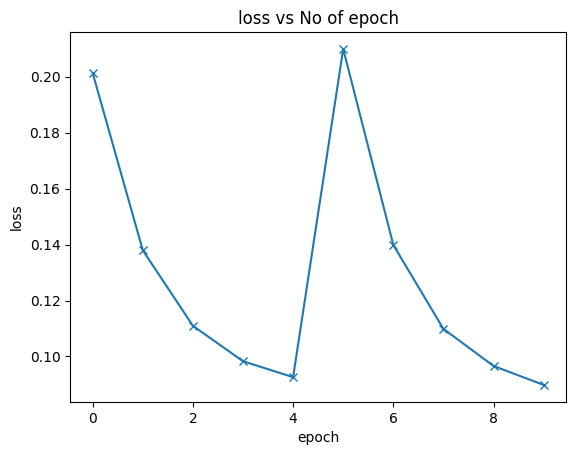

In [ ]:
losses=[x['val_loss'] for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs No of epoch')

Text(0.5, 1.0, 'Accuracy vs No of Epoch')

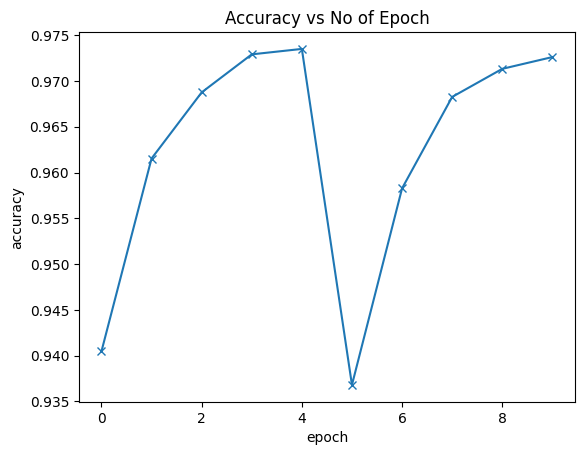

In [ ]:
accuracies=[x['val_acc'] for x in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No of Epoch')

Our current model outperforms the logistic regression model(86% accuracy) by a high margin.It quickly reaches 97% accuracy.To make model more powerful,more hidden layers need to be add.

In [ ]:
# SUMMARY

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [ ]:
dataset=FashionMNIST(root=root,transform=ToTensor(),download=True)

In [ ]:
test_dataset=FashionMNIST(root=root,transform=ToTensor(),download=True)

In [ ]:
val_size=10000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,(train_size,val_size))
len(train_ds)
len(val_ds)

In [ ]:
batch_size=128

In [ ]:
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=2,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

In [ ]:
test_loader=DataLoader(test_dataset,batch_size*2,num_workers=4,pin_memory=True)

In [ ]:
for images,labels in train_loader:
  print('images.shape:',images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images,nrow=16).permute(1,2,0))
  break

In [ ]:
# Modelling:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [ ]:
class MnistModel(nn.Module):
  # FeedForward neural network with one hidden layer
  def __init__(self,in_size,out_size):
    super().__init__()
    self.linear1=nn.Linear(in_size,16)
    self.linear2=nn.Linear(16,32)
    self.linear3=nn.Linear(32,out_size)

  def forward(self,xb):
    # Flatten the image tensor
    out=xb.view(xb.size(0),-1)
    # Get imtermediate outputs using output layers
    out=self.linear1(out)
    # apply activatio fn
    out=F.relu(out)
    out=self.linear2(out)
    out=F.relu(out)
    out=self.linear3(out)
    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc=accuracy(out,labels)
    return {'val_loss':loss.detach(),'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accs=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch[{}],val_loss:{:.4f},val_acc:{:.4f}".format(epoch,result['val_loss'],result['val_acc']))

view() is a PyTorch function used to reshape a tensor without changing its underlying data. It's similar to NumPy's reshape() function.
It returns a new tensor with the same data but with a different shape.


xb.size(0): This gives the size of the first dimension of xb, which typically represents the batch size in deep learning models. For example, if xb has a shape of (32, 3, 28, 28) (representing 32 images of size 28x28 with 3 channels), xb.size(0) would return 32.

-1: The -1 is a special value that tells PyTorch to infer the size of that dimension based on the other dimensions. In this case, it automatically computes the number of features in the second dimension based on the total number of elements in the tensor.

In regression tasks, the goal is to predict continuous values (such as house prices, temperatures, or any real number). The key reason why you don’t need an activation function on the final output in regression tasks is that the raw output (the result from the final linear layer) is unbounded, meaning it can take any real value, both positive and negative.

If you're doing regression, you don’t need any activation on the final output (keep it raw).

In [ ]:
# Using a GPU:
torch.cuda.is_available()

In [ ]:
def get_deffault_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [ ]:
device=get_default_device()
device

In [ ]:
# move tensor to chosen device
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

By setting non_blocking=True, PyTorch performs the data transfer asynchronously, which allows the CPU to continue executing other operations while the data is being transferred to the GPU.

In [ ]:
class DeviceDataLoader():
  # Wrap a dataloader to move data to a device
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device

  def __iter__(self):
    # Yield a batch after moving it to device
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    # Numbers of batches
    return len(self.dl)

In [ ]:
train_loader=DeviceDataLoader(train_loader,device)
val_loader=DeviceDataLoader(val_loader,device)
test_loader=DeviceDataLoader(test_loader,device)

In [ ]:
# Training the model

In [ ]:
def evaluate(model,val_loader):
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []  # Initialize history
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):  # This should iterate exactly 'epochs' times
        model.train()  # Set model to training mode
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation Phase
        model.eval()  # Set model to evaluation mode
        result = evaluate(model, val_loader)  # Evaluate on validation set
        model.epoch_end(epoch, result)  # Log epoch results
        history.append(result)  # Append results to history

    return history


In [ ]:
input_size=784
num_classes=10

In [ ]:
model=MnistModel(input_size,num_classes)
to_device(model,device)

In [ ]:
history=[evaluate (model,val_loader)]
history

In [ ]:
history+=fit(5,0.5,model,train_loader,val_loader)

Training Without model.train():

If you forget to call model.train(), the model might still perform training, but any layers like dropout or batch normalization will behave as though they are in evaluation mode. This might not stop training, but it will hinder the model's ability to generalize and learn effectively.
Evaluation Without model.eval():

If you forget to call model.eval() during validation, dropout and batch normalization will still behave as though you're training the model, causing inaccurate or inconsistent evaluation results.

In [ ]:
history+=fit(5,0.1,model,train_loader,val_loader)

In [ ]:
losses=[x['val_loss'] for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Epoch vs loss')

In [ ]:
accuracies=[x['val_acc'] for x in history]
plt.plot(accuracies,'-x')
plt.xlabel('Epochs')
plt.ylabel('accuracies')
plt.title('Epoch vs Accuracies')

In [ ]:
def predict_image(img,model):
  xb=to_device(img.unsqueeze(0),device)
  yb=model(xb)
  return preds[0].item()

In [ ]:
img,label= test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label:',dataset.classes[label],'Predicted:',daatset.classes[predicted_image])

In [ ]:
evaluate(model,test_loader)

In [ ]:
saved_weights_fname='fashion-feedforward.pth'

In [ ]:
torch.save(model.state_dict,saved_weights_fname)

When we are talking about non linear does not mean,v complex but dropping negative values and it is used in all deep learning models today.(translate text,use images,create text,google autocomplete)

sigmoid( 0 to 1) by applying e to power -x

FeedForward network means to feed one hidden layer output to other and all.

Does the length of each layer should be smaller than prev one? no

Convolutional neural netwiorks solve the problem of spatial invariance(not properly aligned grid)